In [1]:
import  math
import numpy as np
import matplotlib as mpl
from matplotlib import rc,gridspec
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import yoda

mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
mpl.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
mpl.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

In [2]:
datadir="data/"

NNLOJET_03_LO=yoda.readYODA(datadir+"NNLOJET/HJ/NNLOJET_03_LO_3.yoda")
NNLOJET_04_LO=yoda.readYODA(datadir+"NNLOJET/HJ/NNLOJET_04_LO_3.yoda")
NNLOJET_05_LO=yoda.readYODA(datadir+"NNLOJET/HJ/NNLOJET_05_LO_3.yoda")
NNLOJET_07_LO=yoda.readYODA(datadir+"NNLOJET/HJ/NNLOJET_07_LO_3.yoda")
NNLOJET_10_LO=yoda.readYODA(datadir+"NNLOJET/HJ/NNLOJET_10_LO_3.yoda")

NNLOJET_03_NLO=yoda.readYODA(datadir+"NNLOJET/HJ/NNLOJET_03_NLO_3.yoda")
NNLOJET_04_NLO=yoda.readYODA(datadir+"NNLOJET/HJ/NNLOJET_04_NLO_3.yoda")
NNLOJET_05_NLO=yoda.readYODA(datadir+"NNLOJET/HJ/NNLOJET_05_NLO_3.yoda")
NNLOJET_07_NLO=yoda.readYODA(datadir+"NNLOJET/HJ/NNLOJET_07_NLO_3.yoda")
NNLOJET_10_NLO=yoda.readYODA(datadir+"NNLOJET/HJ/NNLOJET_10_NLO_3.yoda")

NNLOJET_03_NNLO=yoda.readYODA(datadir+"NNLOJET/HJ/NNLOJET_03_NNLO_3.yoda")
NNLOJET_04_NNLO=yoda.readYODA(datadir+"NNLOJET/HJ/NNLOJET_04_NNLO_3.yoda")
NNLOJET_05_NNLO=yoda.readYODA(datadir+"NNLOJET/HJ/NNLOJET_05_NNLO_3.yoda")
NNLOJET_07_NNLO=yoda.readYODA(datadir+"NNLOJET/HJ/NNLOJET_07_NNLO_3.yoda")
NNLOJET_10_NNLO=yoda.readYODA(datadir+"NNLOJET/HJ/NNLOJET_10_NNLO_3.yoda")

H7_NLO_PS=yoda.readYODA(datadir+"Herwig/HJ/HJ-NLO-PS-C-HTo2withmass-ShowerWithout.yoda")

Sherpa_MEPSatNLO=yoda.readYODA(datadir+"Sherpa/Higgs/nlops.yoda")




/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:74: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:111: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:144: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


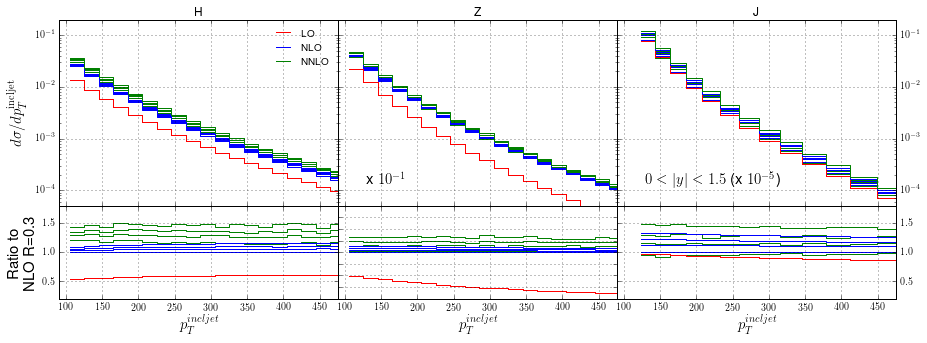

In [3]:
plt.clf()
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 5))
fig=plt.figure(figsize=(15, 5))
gs = gridspec.GridSpec(3, 3,width_ratios= [1,1,1],height_ratios= [1,1,1])
gs.update(wspace=0.0, hspace=0.0)
axH     = plt.subplot(gs[0:2, 0])
axZ     = plt.subplot(gs[0:2, 1])
axJ     = plt.subplot(gs[0:2, 2])
#axconH     = plt.subplot(gs[2, 0])
#axconZ     = plt.subplot(gs[2, 1])
#axconJ     = plt.subplot(gs[2, 2])
axratH     = plt.subplot(gs[2, 0])
axratZ     = plt.subplot(gs[2, 1])
axratJ     = plt.subplot(gs[2, 2])

xxx=range(10,50,2)

def rebin(yo,name):    
    
    a=np.array(yo[name].yVals())[:]
    xmaxs=np.array(yo[name].xMaxs())[:]
    xmins=np.array(yo[name].xMins())[:]
    
    res=[sum((a*(xmaxs-xmins))[xxx[0]:xxx[1]])/(xmaxs[xxx[1]]-xmins[xxx[0]])]
    for i in range(1,len(xxx)-1):
        res+=[sum((a*(xmaxs-xmins))[xxx[i-1]:xxx[i]])/(xmaxs[xxx[i]]-xmins[xxx[i-1]]),
              sum((a*(xmaxs-xmins))[xxx[i]:xxx[i+1]])/(xmaxs[xxx[i+1]]-xmins[xxx[i]])]
    res+=[sum((a*(xmaxs-xmins))[xxx[-2]:xxx[-1]])/(xmaxs[xxx[-1]]-xmins[xxx[-2]])]
    
    return np.array(res)


def rebinx(yo,name):
    a=np.array(yo[name].xVals())[:]
    res=[a[xxx[0]]]
    for i in range(1,len(xxx)-1):
        res+=[a[xxx[i]],a[xxx[i]]]
    res+=[a[xxx[len(xxx)-1]]]
    return np.array(res)

rat=[]
for R,i in zip(["03","05","07","10"],range(6)):
    NNLOJET_R_LO_3=yoda.readYODA(datadir+"NNLOJET/HJ/NNLOJET_%s_LO_3.yoda"%R)
    NNLOJET_R_NLO_3=yoda.readYODA(datadir+"NNLOJET/HJ/NNLOJET_%s_NLO_3.yoda"%(R))
    NNLOJET_R_NNLO_3=yoda.readYODA(datadir+"NNLOJET/HJ/NNLOJET_%s_NNLO_3.yoda"%(R))
    x=rebinx(NNLOJET_R_LO_3,"/LH2017_ZHJETS/J1_pT_R%s"%R)
    nnlo1=rebin(NNLOJET_R_NNLO_3,"/LH2017_ZHJETS/J1_pT_R%s"%R)
    nnlo2=rebin(NNLOJET_R_NNLO_3,"/LH2017_ZHJETS/J2_pT_R%s"%R)
    nnlo3=rebin(NNLOJET_R_NNLO_3,"/LH2017_ZHJETS/J3_pT_R%s"%R)
    
    lo=rebin(NNLOJET_R_LO_3,"/LH2017_ZHJETS/J1_pT_R%s"%R)
    lo+=rebin(NNLOJET_R_LO_3,"/LH2017_ZHJETS/J2_pT_R%s"%R)
    lo+=rebin(NNLOJET_R_LO_3,"/LH2017_ZHJETS/J3_pT_R%s"%R)
    nlo=rebin(NNLOJET_R_NLO_3,"/LH2017_ZHJETS/J1_pT_R%s"%R)
    nlo+=rebin(NNLOJET_R_NLO_3,"/LH2017_ZHJETS/J2_pT_R%s"%R)
    nlo+=rebin(NNLOJET_R_NLO_3,"/LH2017_ZHJETS/J3_pT_R%s"%R)
    nnlo=rebin(NNLOJET_R_NNLO_3,"/LH2017_ZHJETS/J1_pT_R%s"%R)
    nnlo+=rebin(NNLOJET_R_NNLO_3,"/LH2017_ZHJETS/J2_pT_R%s"%R)
    nnlo+=rebin(NNLOJET_R_NNLO_3,"/LH2017_ZHJETS/J3_pT_R%s"%R)
    
    if R=="03":
        axH.plot(x,lo,color="red",label="LO")
        axH.plot(x,nlo,color="blue",label="NLO")
        axH.plot(x,nnlo,color="green",label="NNLO")
    else:
        axH.plot(x,lo,color="red",label="")
        axH.plot(x,nlo,color="blue",label="")
        axH.plot(x,nnlo,color="green",label="")
    
    #axconH.plot(x,nnlo1/nnlo,color="grey")
    #axconH.plot(x,nnlo2/nnlo,color="grey",linestyle="dotted")
    #axconH.plot(x,nnlo3/nnlo,color="grey",linestyle="dashed")
    if rat==[]:
        rat=nlo
    
    axratH.plot(x,lo/rat,color="red")
    axratH.plot(x,nlo/rat,color="blue")
    axratH.plot(x,nnlo/rat,color="green")
axH.semilogy()    

rat=[]

for R,i in zip(["03","05","07","10"],range(6)):
    NNLOJET_R_LO_3=yoda.readYODA(datadir+"NNLOJET/ZJ/NNLOJET_%s_LO_3.yoda"%R)
    NNLOJET_R_NLO_3=yoda.readYODA(datadir+"NNLOJET/ZJ/NNLOJET_%s_NLO_3.yoda"%(R))
    NNLOJET_R_NNLO_3=yoda.readYODA(datadir+"NNLOJET/ZJ/NNLOJET_%s_NNLO_3.yoda"%(R))

    x=rebinx(NNLOJET_R_LO_3,"/LH2017_ZHJETS/J1_pT_R%s"%R)
    nnlo1=rebin(NNLOJET_R_NNLO_3,"/LH2017_ZHJETS/J1_pT_R%s"%R)
    nnlo2=rebin(NNLOJET_R_NNLO_3,"/LH2017_ZHJETS/J2_pT_R%s"%R)
    nnlo3=rebin(NNLOJET_R_NNLO_3,"/LH2017_ZHJETS/J3_pT_R%s"%R)
    
    lo=rebin(NNLOJET_R_LO_3,"/LH2017_ZHJETS/J1_pT_R%s"%R)
    lo+=rebin(NNLOJET_R_LO_3,"/LH2017_ZHJETS/J2_pT_R%s"%R)
    lo+=rebin(NNLOJET_R_LO_3,"/LH2017_ZHJETS/J3_pT_R%s"%R)
    nlo=rebin(NNLOJET_R_NLO_3,"/LH2017_ZHJETS/J1_pT_R%s"%R)
    nlo+=rebin(NNLOJET_R_NLO_3,"/LH2017_ZHJETS/J2_pT_R%s"%R)
    nlo+=rebin(NNLOJET_R_NLO_3,"/LH2017_ZHJETS/J3_pT_R%s"%R)
    nnlo=rebin(NNLOJET_R_NNLO_3,"/LH2017_ZHJETS/J1_pT_R%s"%R)
    nnlo+=rebin(NNLOJET_R_NNLO_3,"/LH2017_ZHJETS/J2_pT_R%s"%R)
    nnlo+=rebin(NNLOJET_R_NNLO_3,"/LH2017_ZHJETS/J3_pT_R%s"%R)
    
    axZ.plot(x,lo*10**-1,color="red")
    axZ.plot(x,nlo*10**-1,color="blue")
    axZ.plot(x,nnlo*10**-1,color="green")
    
    #axconZ.plot(x,nnlo1/nnlo,color="grey")
    #axconZ.plot(x,nnlo2/nnlo,color="grey",linestyle="dotted")
    #axconZ.plot(x,nnlo3/nnlo,color="grey",linestyle="dashed")
    if rat==[]:
        rat=nlo
    
    axratZ.plot(x,lo/rat,color="red")
    axratZ.plot(x,nlo/rat,color="blue")
    axratZ.plot(x,nnlo/rat,color="green")
    
    
axZ.semilogy()    

xxx=range(0,25,1)

NNLOJET_R_LO_3=yoda.readYODA(datadir+"NNLOJET/JJ/NNLOJET_LO.yoda")
NNLOJET_R_NLO_3=yoda.readYODA(datadir+"NNLOJET/JJ/NNLOJET_NLO.yoda")
NNLOJET_R_NNLO_3=yoda.readYODA(datadir+"NNLOJET/JJ/NNLOJET_NNLO.yoda")
    
rat=[]
for R,i in zip(["3","5","7","10"],range(6)):
    
    x=rebinx(NNLOJET_R_LO_3,'/CMS_RAD/d01-x01-y01-AK%s'%R)
    lo  =rebin(NNLOJET_R_LO_3,'/CMS_RAD/d01-x01-y01-AK%s'%R)
    lo  +=rebin(NNLOJET_R_LO_3,'/CMS_RAD/d02-x01-y01-AK%s'%R)
    lo  +=rebin(NNLOJET_R_LO_3,'/CMS_RAD/d03-x01-y01-AK%s'%R)
    nlo =rebin(NNLOJET_R_NLO_3,'/CMS_RAD/d01-x01-y01-AK%s'%R)
    nlo +=rebin(NNLOJET_R_NLO_3,'/CMS_RAD/d02-x01-y01-AK%s'%R)
    nlo +=rebin(NNLOJET_R_NLO_3,'/CMS_RAD/d03-x01-y01-AK%s'%R)
    nnlo=rebin(NNLOJET_R_NNLO_3,'/CMS_RAD/d01-x01-y01-AK%s'%R)
    nnlo+=rebin(NNLOJET_R_NNLO_3,'/CMS_RAD/d02-x01-y01-AK%s'%R)
    nnlo+=rebin(NNLOJET_R_NNLO_3,'/CMS_RAD/d03-x01-y01-AK%s'%R)
    axJ.plot(x,lo*10**-5,color="red")
    axJ.plot(x,nlo*10**-5,color="blue")
    axJ.plot(x,nnlo*10**-5,color="green")
    
    if rat==[]:
        rat=nlo
    axratJ.plot(x,lo/rat,color="red")
    axratJ.plot(x,nlo/rat,color="blue")
    axratJ.plot(x,nnlo/rat,color="green")
    
axJ.text(0.1, 0.1, "$0<|y|<1.5$ (x $10^{-5}$)",
                 verticalalignment='bottom',  horizontalalignment='left',
                 transform=axJ.transAxes, color='black', fontsize=15)


axZ.text(0.1, 0.1, "x $10^{-1}$",
                 verticalalignment='bottom',  horizontalalignment='left',
                 transform=axZ.transAxes, color='black', fontsize=15)


axZ.set_yticklabels([])
axratZ.set_yticklabels([])

axJ.yaxis.tick_right()
axratJ.yaxis.tick_right()

for ax in [axZ,axJ,axH,axratH,axratJ,axratZ]:
    ax.xaxis.set_ticks_position("both")
    ax.xaxis.set_tick_params(direction="in",which="both")
    ax.yaxis.set_ticks_position("both")
    ax.yaxis.set_tick_params(direction="in",which="both")
    ax.grid(linestyle='dotted');



axJ.yaxis.set_label_position("right")
    

    

axH.legend(frameon=False,fontsize=10)
axZ.set_xlim([90.0,475])
axH.set_xlim([90.0,475])
axJ.set_xlim([90.0,475])


axratH.set_xlim([90.0,475])
axratZ.set_xlim([90.0,475])
axratJ.set_xlim([90.0,475])

axZ.set_ylim([0.00005,0.2])
axH.set_ylim([0.00005,0.2])
axJ.set_ylim([0.00005,0.2])

axratH.set_ylim([0.2,1.8])
axratZ.set_ylim([0.2,1.8])
axratJ.set_ylim([0.2,1.8])

axJ.semilogy()

axH.set_title("H")
axZ.set_title("Z")
axJ.set_title("J")

axratH.set_xlabel("$p^{incl jet}_T$", fontsize=15)
axratZ.set_xlabel("$p^{incl jet}_T$", fontsize=15)
axratJ.set_xlabel("$p^{incl jet}_T$", fontsize=15)

axH.set_ylabel("$d\sigma/dp^{\mathrm{incl jet}}_T$", fontsize=15)
axratH.set_ylabel("Ratio to \n NLO R=0.3", fontsize=15)

axratH.yaxis.set_ticks(np.arange(0.5, 2.0, 0.5))
axratJ.yaxis.set_ticks(np.arange(0.5, 2.0, 0.5))

fig.savefig("Comparison_Plot.pdf",bbox_inches='tight')
plt.show()